In [1]:
from google.colab import files
uploaded = files.upload()

Saving Big_five_Survey_data.csv to Big_five_Survey_data.csv


In [3]:
import pandas as pd #pandas is tool for Tables Rows & columns, Excel-like data, CSV files, Survey data

df = pd.read_csv("Big_five_Survey_data.csv")
print(df.head())

            nick1  Is.talkative  Tends.to.find.fault.with.others  \
0           Aajax             3                                3   
1             abc             1                                2   
2        Aflatoon             3                                2   
3    Akuna.matata             4                                4   
4  Albino Peacock             3                                2   

   Does.a.thorough.job  Is.depressed..blue  \
0                    4                   3   
1                    4                   2   
2                    4                   2   
3                    5                   2   
4                    4                   3   

   Is.original..comes.up.with.new.ideas  Is.reserved  \
0                                     4            4   
1                                     4            4   
2                                     4            4   
3                                     3            4   
4                                 

In [4]:
print(df.shape) #sanity check of the columns
print(df.columns)

(185, 46)
Index(['nick1', 'Is.talkative', 'Tends.to.find.fault.with.others',
       'Does.a.thorough.job', 'Is.depressed..blue',
       'Is.original..comes.up.with.new.ideas', 'Is.reserved',
       'Is.helpful.and.unselfish.with.others', 'Can.be.somewhat.careless',
       'Is.relaxed..handles.stress.well',
       'Is.curious.about.many.different.things', 'Is.full.of.energy',
       'Starts.quarrels.with.others', 'Is.a.reliable.worker', 'Can.be.tense',
       'Is.ingenious..a.deep.thinker', 'Generates.a.lot.of.enthusiasm',
       'Has.a.forgiving.nature', 'Tends.to.be.disorganized', 'Worries.a.lot',
       'Has.an.active.imagination', 'Tends.to.be.quiet',
       'Is.generally.trusting', 'Tends.to.be.lazy',
       'Is.emotionally.stable..not.easily.upset', 'Is.inventive',
       'Has.an.assertive.personality', 'Can.be.cold.and.aloof',
       'Perseveres.until.the.task.is.finished', 'Can.be.moody',
       'Values.artistic..aesthetic.experiences', 'Is.sometimes.shy..inhibited',
       'Is.

In [5]:
df_numeric = df.select_dtypes(include=["number"]) #sanity check
print(df_numeric.head())

   Is.talkative  Tends.to.find.fault.with.others  Does.a.thorough.job  \
0             3                                3                    4   
1             1                                2                    4   
2             3                                2                    4   
3             4                                4                    5   
4             3                                2                    4   

   Is.depressed..blue  Is.original..comes.up.with.new.ideas  Is.reserved  \
0                   3                                     4            4   
1                   2                                     4            4   
2                   2                                     4            4   
3                   2                                     3            4   
4                   3                                     3            3   

   Is.helpful.and.unselfish.with.others  Can.be.somewhat.careless  \
0                                  

In [6]:
from sklearn.preprocessing import StandardScaler #sklearn ML tool box, preprocessing data, standardscalar is used to rescale numbers to compare with each other

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


In [18]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=42)

In [22]:
fa.fit(scaled_data)

FactorAnalysis(n_components=2, random_state=42)

In [23]:
loadings = pd.DataFrame(
    fa.components_.T,
    columns=["Factor 1", "Factor 2"],
    index=df_numeric.columns
)

print(loadings)


                                               Factor 1  Factor 2
Is.talkative                                  -0.520898  0.592446
Tends.to.find.fault.with.others                0.218064  0.298445
Does.a.thorough.job                           -0.230614 -0.453722
Is.depressed..blue                             0.477603  0.192065
Is.original..comes.up.with.new.ideas          -0.402472 -0.158666
Is.reserved                                    0.573528 -0.355202
Is.helpful.and.unselfish.with.others          -0.189723 -0.161251
Can.be.somewhat.careless                      -0.028137  0.437159
Is.relaxed..handles.stress.well               -0.417433 -0.327023
Is.curious.about.many.different.things        -0.346370 -0.217382
Is.full.of.energy                             -0.541786  0.178847
Starts.quarrels.with.others                    0.166644  0.425515
Is.a.reliable.worker                          -0.280410 -0.403922
Can.be.tense                                   0.326348  0.263745
Is.ingenio

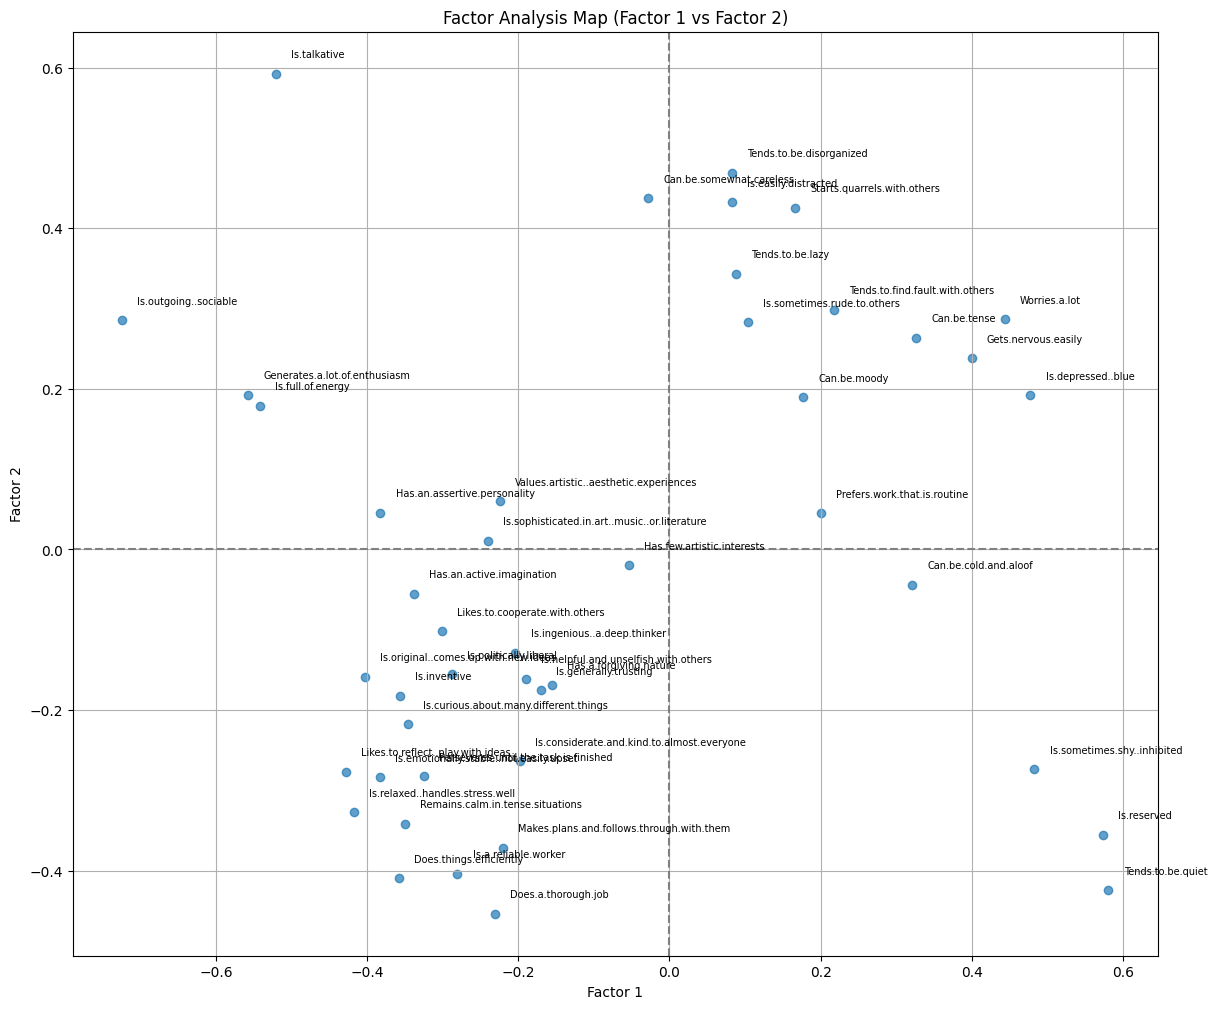

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 12)) # Increased figure size for better readability
plt.scatter(loadings["Factor 1"], loadings["Factor 2"], alpha=0.7)

for i, label in enumerate(loadings.index):
    # Adding a small offset to the text to prevent it from overlapping the points
    plt.text(loadings["Factor 1"].iloc[i] + 0.02, loadings["Factor 2"].iloc[i] + 0.02, label, fontsize=7) # Slightly smaller font

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Map (Factor 1 vs Factor 2)")
plt.grid(True)
plt.show()